In [1]:
import saspy
my_session = saspy.SASsession()

Using SAS Config named: oda
Pandas module not available. Setting results to HTML
SAS Connection established. Subprocess id is 176606



# Estimation and Confidence Intervals

We often report an estimate and its **standard error (SE)**. Standard error is the standard deviation of a _statistic_ (rather than of the population). For a random sample, the standard error of the sample mean (SEM) is 

$$
SE(\bar{Y}) = \frac{\sigma}{\sqrt{n}} \\
$$

Since we do not know the standard deviation of the _population_ ($\sigma$), we can estimate the standard error of the sample mean as

$$
\hat{SE}(\bar{Y}) = \frac{s}{\sqrt{n}} \\
$$

If we are observing the wingspan of 25 butterflies with a sample mean of 3.53 and a sample standard deviation of 0.17, then

$$
SEM = \frac{0.17}{\sqrt{25}} \approx 0.034 \\
$$

**Q.** What do we mean by the term "estimation"?

**A.** Attempting to use data to give a value (or range of values) for a parameter.

**Q.** Why do we need to report more than a point estimate when using data to describe a parameter?

**A.** A point estimate alone does not given an idea of variability. We usually provide a standard error or a confidence interval as well.

**Q.** What does the standard error of a statistic measure?

**A.** Variability (standard deviation) in the statistic.

## Frequentist estimation via method of moments and maximum likelihood (the math behind estimates)

A point _estimate_ (e.g. the actual number $\bar{y}$ or $s$) is an observed value of a point _estimator_ (a random variable, such as $\bar{Y}$ or $S$, that we will use to make an inference). $\bar{Y}$, which we often observe in a normal distribution, is a common estimator of the population mean, $\mu$. Estimators have several key properties:
* If we take many different samples and look at the estimator across all of those samples, the average of the estimators should give the true population value (an "unbiased" estimator)
* The estimator should have as little variation as possible from dataset to dataset (a small standard error, SE)
* The bigger the sample, the closer the estimator is to the true population value ("consistent" estimator)

A point estimator is a random quantity that has yet to be observed.  For instance, the idea of taking a sample mean of the amount of debt of 100 randomly selected people.  The quantity isn’t observed yet and is random – it has a distribution, mean, standard error, etc.  We usually denote estimators with uppercase values.

A point estimate is a fixed quantity – the observed value of the estimator.  For instance, if we observed the 100 randomly selected people and their sample mean amount of debt was 175 thousand.  This quantity is fixed or known.  We usually denote estimates with lowercase values.

**Q.** What do we mean by the term "consistent estimator"?

**A.** An estimator that is observed arbitrarily close to the parameter as the sample size increases is a consistent estimator.  This just implies that our estimator eventually is observed right at the truth.

Note: If the bias of the estimator is 0 or goes away as the sample size grows and the standard error shrinks toward 0 as the sample size grows, the estimator will be consistent! This should make some sense, bias tells us where the estimator is observed on average and standard error tells us how variable our estimator is. If on average we take on the true value and our variation decreases towards 0, we must be observing closer and closer to the truth!

**Q.** What is the basic idea of the Method of Moments estimation procedure?

**A.** We take sample moments (such as $\bar{Y}$) and set them equal to population moments (such as E(Y)) and solve the equations of the parameters.

#### Two common methods for creating an estimator

We hope our estimators have nice properties
* Unbiased
* Low variance/standard error
* Consistency
* Easy-to-use sampling distributions

**Method of Moments (MOM)**

If we have a random sample, MOM uses the sample average and the population averages to create estimators. On the upside, MOM makes the finding of estimators easy and MOM estimators are consistent; on the downside, the distribution of the created estimator can be difficult to determine and gamma MOM estimators are not unbiased (taking more samples does not bring us closer to the right answer). 

_Gamma Distribution Example_: We have a gamma distribution $Y\sim Gamma(\alpha,\beta)$ where $Y$ is the time spent reading a news article. For gamma distributions,

$$
\mu = E(Y) = \frac{\alpha}{\beta}\\
\sigma^2 = Var(Y) = \frac{\alpha}{\beta^2} \\
E(Y^2) = \frac{\alpha(\alpha+1)}{\beta^2}
$$

where $E(Y)$ and $E(Y^2)$ are the population (raw) _moments_. We can observe a random sample of times spent reading a news article (a random sample of $Y$s). The Law of Large Numbers states that, for large sample sizes, the sample averages should be very close to the population averages. That is,

$$
\hat{\alpha} = \frac{\bar{Y}^2}{\frac{\sum_{i=1}^{n} Y_{i}^2}{n} - \bar{Y}^2} \approx\frac{\bar{y}^2}{\frac{\sum_{i=1}^{n} y_{i}^2}{n} - \bar{y}^2} \\ \text{ and }\\
\hat{\beta} = \frac{\bar{Y}}{\frac{\sum_{i=1}^{n} Y_{i}^2}{n} - \bar{Y}^2} \approx \frac{\bar{y}}{\frac{\sum_{i=1}^{n} y_{i}^2}{n} - \bar{y}^2}
$$

_Binomial/Bernoulli MOM example_: Our population is all of the customers at a bank and each customer follows a Bernoulli distribution. Our parameter $p$ is the proportion of customers willing to open an additional account. We observe 40 random customers. We can define $X_{i}=1$ if a customer $i$ opens an account, where $X_{i} \sim ^{iid} Ber(p)$. We can also define $Y$ as the number of customers opening an account, where 

$$
Y = \sum_{i=1}^{n} X_{i}\sim Bin(n,p)
$$

What is the MOM estimator of $p$?

MOM tells us to set the sample average to the population average.

$$
X \sim Ber(p) \\
E(X) = p \\
Var(X) = p(1-p)
$$

Here, $\bar{X} \approx p$ and 

$$
\text{Sample proportion} = \hat{p} = \frac{Y}{n}
$$

This estimator is unbiased (on average, it gives us $p$) and consistent and

$$
\text{Standard error} = SE(\hat{p}) = \sqrt{\frac{p(1-p)}{n}}
$$

Moreover, $\hat{p}$ can be approximated using a normal distribution so that

$$
\hat{p} \sim N(p,\sqrt{\frac{p(1-p)}{n}})
$$

**Maximum Likelihood (ML)**

ML uses the assumed curve to find the "most likely" values of the parameters to produce the data we see. Mathematically, they are more difficult, but they are generally consistent and the distribution of an MLE can often be approximated with a normal curve.

_Exponential distribution example_: The exponential distribution is a special case of the gamma with $\alpha = 1$. All we need to estimate is the $\beta$. If $Y$ is the time spent reading a news article, then 

$$
Y \sim Gamma(1, \beta) \sim (Exp \beta) \\
f(y) = \beta e^{-\beta y}, y \gt 0 \\
\mu = E(Y) = \frac{1}{\beta} \\
\sigma^2 = Var(Y) = \frac{1}{\beta^2}
$$

The PDF tells us "give me a $\beta$ and I will give you an observed value $y$". The likelihood reverses that and tells us "give me an observed value $y$ and I will give you a $\beta$". 

$$
f(y | \beta) = \beta e^{-\beta y}, y \gt 0, \beta \gt 0 \\
L(\beta | y) = \beta e^{-\beta y}, y \gt 0, \beta \gt 0
$$

<div class="alert alert-block alert-success">
<b>Tip:</b> For generic $y$ value, the MLE for the exponential distribution is 

$$
\hat{\beta} = \frac{1}{y}
$$

That is, the most likely value of $\beta$ to produce $y$ is 1/$y$. For a random sample of $Y$s, $\hat{\beta}_{MLE} = \frac{1}{\bar{Y}}$
</div>

For a random sample of $Y$s, 

$$
Y_{i} \sim ^{iid} Exp(\beta), i=1,...,n
$$

We can find the joint distribution as follows

$$
A \text{ independent } B = P(A \cap B) = P(A)P(B)\\
f(y_1, y_2,...,y_n) = f(y_1)f(y_2)...f(y_n) \\
=\beta e^{-\beta y_1}\beta e^{-\beta y_2}...\beta e^{-\beta y_n} \\
= \beta^n e^{-\beta \sum_{i=1}^{n} y_{i}}
$$

**Q.** What is the difference between a joint distribution (say $f(y_1,...,y_n|parameters)$) and a likelihood (say $L(parameters|y_1,...,y_n)$)?

**A.** With a joint distribution, we consider the parameters to be known and the y’s can be varied (for instance in finding $P(Y_{1} \gt 10, Y_{2} \gt 5)$. With a likelihood, we assume the data is known and that the parameters can be varied. This allows us to maximize the function with respect to the parameter value(s). The value of the parameter that corresponds to this maximum is called the maximum likelihood estimator. 

#### Common ML and MOM comparison

<center><img src="mom_ml_estimators.png" style="width:600px"/></center>

## Central Limit Theorem and Confidence Intervals

A sampling distribution is the pattern and frequency of a statistic/estimator. For a random sample (iid) of size $n$ from a population with mean $\mu$ and variance $\sigma^2$, a good approximation to the distribution of the sample mean in a "large" sample is a normal distribution where

$$
\bar{Y} \sim N(\mu, \frac{\sigma}{\sqrt{n}}) \\
\text{with} \\
Z = \frac{\bar{Y} - \mu}{\frac{\sigma}{\sqrt{n}}}
$$

The confidence interval is the range of values that contain the true parameter.
* Often use 95% confidence
  * For 100 samples, about 95 intervals would contain the population mean

Probability statements about a Binomial can be approximated using either

$$
\hat{p} \sim N(p, \sqrt{\frac{p(1-p)}{n}}) \\
\text{with} \\
Z = \frac{\hat{p} - p}{\sqrt{\frac{p(1-p)}{n}}}
$$

or via

$$
Y \sim N(np, \sqrt{np(1-p)}) \\
\text{with} \\
Z = \frac{Y-np}{\sqrt{np(1-p)}}
$$

#### Continuity correction

When is a continuity correction useful?

Anytime we approximate the distribution of something discrete with a continuous distribution, we can utilize a continuity correction to improve our probability approximations. 

We saw the continuity correction applied to the Binomial and Poisson (both discrete distributions).

#### Confidence

Confidence refers to how much we believe in our procedure. That is, if we are 95% confident, that means that our procedure will produce a confidence interval that capture the truth 95% of the time.

Said another way, if we were to repeatedly sample people and find a confidence interval for the average amount of debt people have, 95% of the intervals we created would capture the truth.

**Q.**: In a confidence interval of the form point estimate +/- MOE, the Margin of Error (MOE) is determined by which of the following?

**A.**: (estimated) standard error of the estimator, level of confidence we want (a-$\alpha$)100%, sampling distribution


In [ ]:
%%SAS my_session
PROC FREQ Data=Color;
  TABLES EYES/BINOMIAL(Wald);
RUN;

### Common CIs

#### For a single mean
<center><img src="common_ci_single_mean.png" style="width:800px"/></center>

Where $\bar{Y}$ is the _sample_ average and $\mu$ is the _population_ average. 

A normal distribution is described by $\mu$ and $\sigma$. A t-distribution is described by degrees of freedom, calculated as sample size $n$ minus one ($t_{n-1}$, the last row in the chart above). 

**Q.**: Suppose we want to make inference for a population mean.  When should we use the “z” interval vs the “t” interval?  (i.e. when should we use the one-sample z interval instead of the one-sample t interval.)

**A.**: The t interval should be used when your population is roughly normally distributed.  A z interval should be used when you have a ‘large’ sample size. 
Note: The t interval and z interval are basically the same for sample sizes above 40 or 50 or so!

**Q.**: What is meant by paired data?  Why do we have to treat paired data differently than the previous “two-sample” case?

**A.**: Data that consists of two measurements on the same (or very similar/matched) units is paired data.  Since the observations are made on very similar units we can’t assume the two observations are independent.

**Q.**: How are the paired t-interval and the one-sample t-interval related?

**A.**: The paired t-interval is equivalent to doing a one-sample t-interval on the differences of the paired data.  Both assume normality (either of the differences or of the single sample, respectively).

### T-test in SAS
Consider data on the length of court cases.
* Population = all court cases in some district
* Sample = 20 cases (variable days)
* Make inference about the average length of all court cases, $\mu$
* Create a 99% confidence interval for $\mu$ using ALPHA = 0.01

In [ ]:
%%SAS my_session

PROC TTEST DATA = cases ALPHA = 0.01 PLOTS = all;
  VAR days;
RUN;

# General problems

In [2]:
%%SAS my_session
DATA geom;
     INPUT trials;
     DATALINES;
5
1
3
9
6
6
5
3
8
7
;


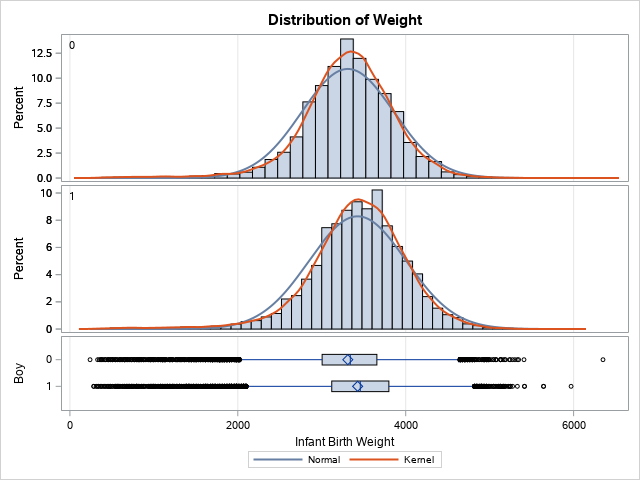
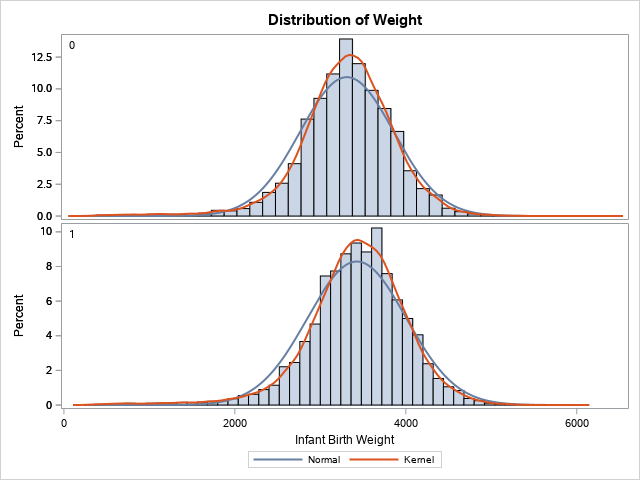
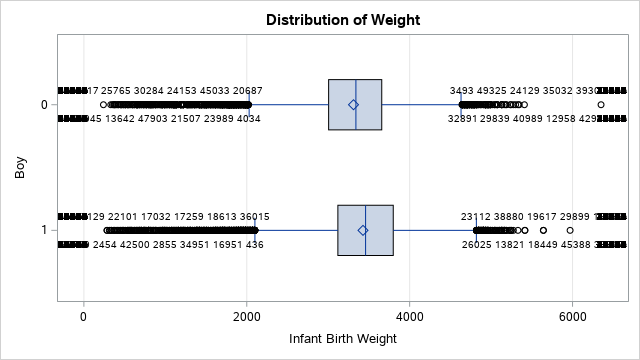
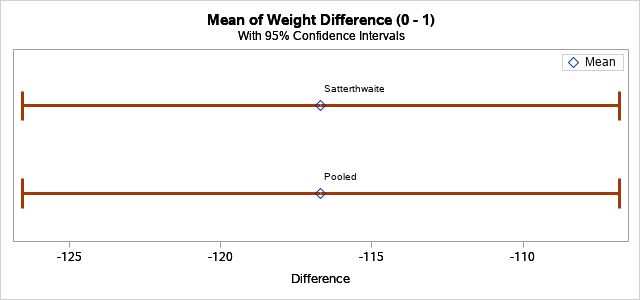
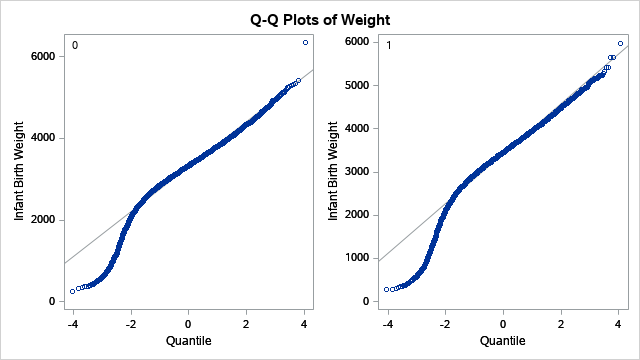

In [6]:
%%SAS my_session
PROC TTEST DATA = sashelp.bweight ALPHA = 0.05 PLOTS = all;
class boy;
VAR weight;
RUN;


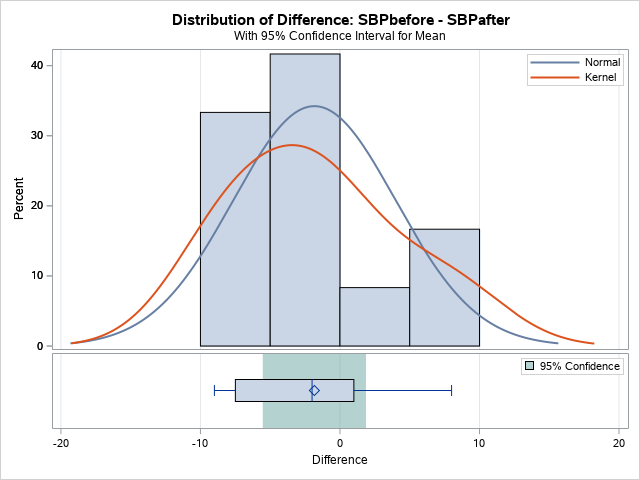
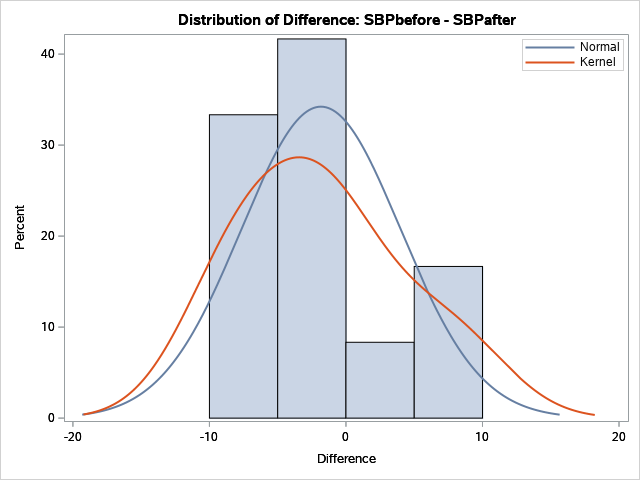
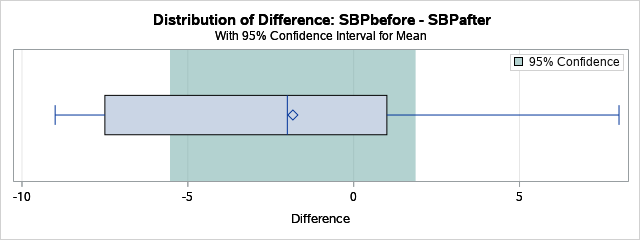
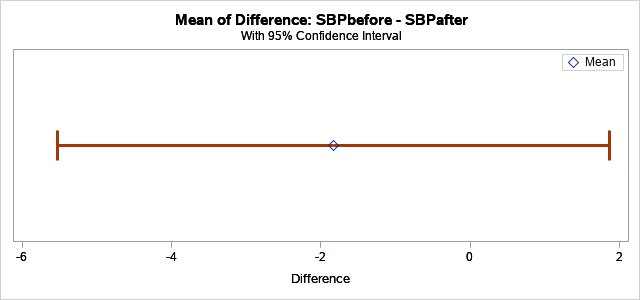
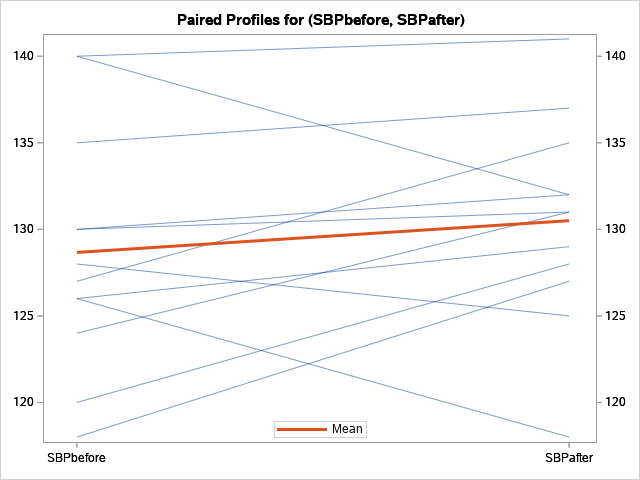
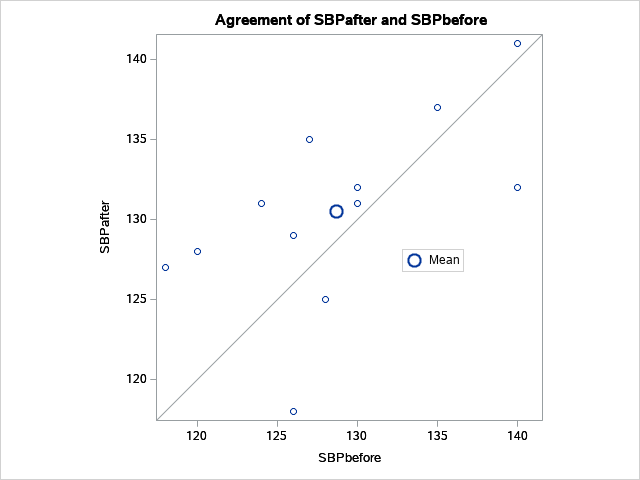
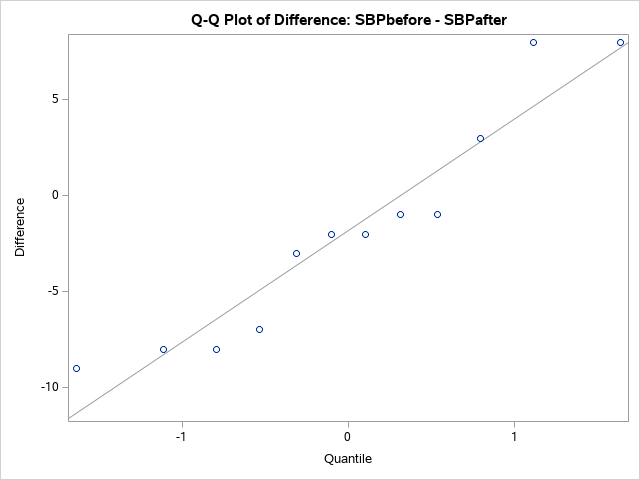

In [13]:
%%SAS my_session
DATA pressure;
   INPUT SBPbefore SBPafter;
   DATALINES;
120 128   
124 131   
130 131   
118 127
140 132   
128 125   
140 141   
135 137
126 118   
130 132   
126 129   
127 135
;

PROC TTEST DATA = pressure PLOTS = all;
PAIRED SBPbefore*SBPafter;
RUN;


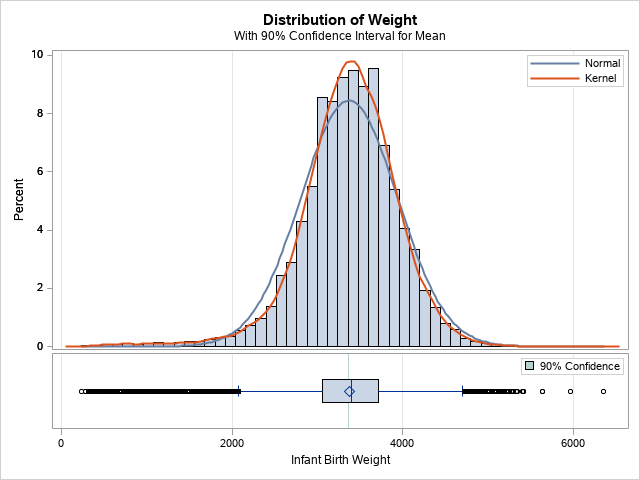
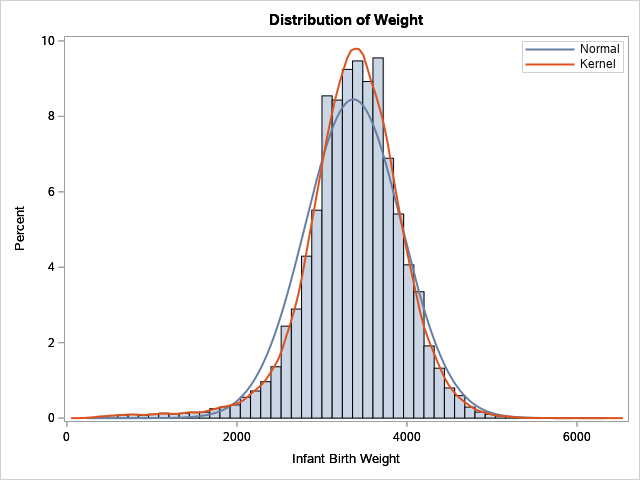
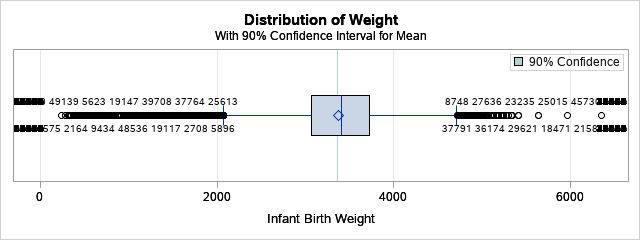
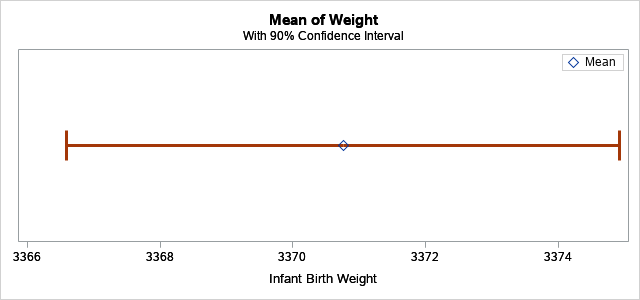
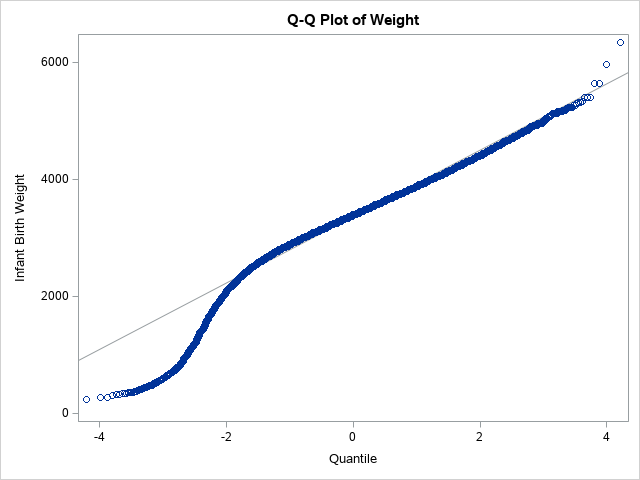

In [14]:
%%SAS my_session
PROC TTEST DATA = sashelp.bweight ALPHA = 0.1 PLOTS = all;
VAR weight;
RUN;

In [15]:
%%SAS my_session
PROC FREQ DATA=sashelp.bweight;
TABLES Weight/BINOMIAL(Wald);
RUN;